# Stopping Times in Stochastic Processes

## 1. Introduction and Mathematical Foundation

A **stopping time** (or **Markov time**) is a fundamental concept in probability theory and stochastic processes. It formalizes the notion of a random time at which we "stop" observing a process, based only on information available up to that time.

### Definition

Let $(\Omega, \mathcal{F}, \{\mathcal{F}_t\}_{t \geq 0}, \mathbb{P})$ be a filtered probability space. A random variable $\tau: \Omega \to [0, \infty]$ is called a **stopping time** with respect to the filtration $\{\mathcal{F}_t\}$ if:

$$\{\tau \leq t\} \in \mathcal{F}_t \quad \text{for all } t \geq 0$$

This condition ensures that the decision to stop at time $t$ can be made using only information available up to time $t$ — we cannot "look into the future."

### Key Examples of Stopping Times

1. **First Hitting Time**: For a stochastic process $\{X_t\}$ and a set $A$:
   $$\tau_A = \inf\{t \geq 0 : X_t \in A\}$$

2. **First Passage Time**: For a Brownian motion $\{W_t\}$ and level $a > 0$:
   $$\tau_a = \inf\{t \geq 0 : W_t = a\}$$

3. **Exit Time**: Time when a process first leaves a region $D$:
   $$\tau_D = \inf\{t \geq 0 : X_t \notin D\}$$

### The Optional Stopping Theorem

One of the most powerful results involving stopping times is the **Optional Stopping Theorem** (Doob's theorem). For a martingale $\{M_t\}$ and a stopping time $\tau$:

$$\mathbb{E}[M_\tau] = \mathbb{E}[M_0]$$

provided certain regularity conditions hold (e.g., $\tau$ is bounded, or $M$ is uniformly integrable).

### Distribution of First Passage Time for Brownian Motion

For standard Brownian motion $\{W_t\}$ starting at $W_0 = 0$, the first passage time to level $a > 0$:
$$\tau_a = \inf\{t \geq 0 : W_t = a\}$$

has the **inverse Gaussian** (or Lévy) distribution with density:

$$f_{\tau_a}(t) = \frac{a}{\sqrt{2\pi t^3}} \exp\left(-\frac{a^2}{2t}\right), \quad t > 0$$

This is known as the **Lévy distribution** (a special case of the inverse Gaussian).

Key properties:
- $\mathbb{E}[\tau_a] = \infty$ (infinite mean)
- $\mathbb{P}(\tau_a < \infty) = 1$ (almost surely finite)
- Heavy-tailed: $\mathbb{P}(\tau_a > t) \sim \frac{a}{\sqrt{2\pi t}}$ as $t \to \infty$

## 2. Simulation Setup

We will simulate:
1. Standard Brownian motion paths
2. First passage times to various levels
3. Compare empirical distributions with theoretical predictions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Simulation parameters
n_paths = 10000        # Number of Brownian motion paths
dt = 0.001             # Time step
T_max = 50.0           # Maximum simulation time
n_steps = int(T_max / dt)

# Target levels for first passage times
levels = [0.5, 1.0, 2.0]

print(f"Simulating {n_paths} Brownian motion paths")
print(f"Time step: dt = {dt}")
print(f"Maximum time: T_max = {T_max}")
print(f"Target levels: {levels}")

Simulating 10000 Brownian motion paths
Time step: dt = 0.001
Maximum time: T_max = 50.0
Target levels: [0.5, 1.0, 2.0]


## 3. Brownian Motion Simulation and First Passage Time Computation

We simulate Brownian motion using the discrete approximation:
$$W_{t+\Delta t} = W_t + \sqrt{\Delta t} \cdot Z$$
where $Z \sim \mathcal{N}(0,1)$.

In [2]:
def simulate_brownian_first_passage(n_paths, dt, T_max, level):
    """
    Simulate Brownian motion paths and compute first passage times to a given level.
    
    Parameters:
    -----------
    n_paths : int
        Number of independent Brownian motion paths
    dt : float
        Time step for discretization
    T_max : float
        Maximum simulation time
    level : float
        Target level for first passage (a > 0)
    
    Returns:
    --------
    first_passage_times : ndarray
        Array of first passage times (np.inf if level not reached)
    """
    n_steps = int(T_max / dt)
    sqrt_dt = np.sqrt(dt)
    
    # Initialize storage
    first_passage_times = np.full(n_paths, np.inf)
    
    # Current position of each path
    W = np.zeros(n_paths)
    
    # Track which paths have not yet hit the level
    active = np.ones(n_paths, dtype=bool)
    
    for step in range(1, n_steps + 1):
        # Generate increments only for active paths
        dW = sqrt_dt * np.random.randn(np.sum(active))
        W[active] += dW
        
        # Check for level crossing (both positive and negative)
        hit_positive = active & (W >= level)
        hit_negative = active & (W <= -level)
        hit = hit_positive | hit_negative
        
        # Record first passage times
        first_passage_times[hit] = step * dt
        active[hit] = False
        
        # Early termination if all paths have hit
        if not np.any(active):
            break
    
    return first_passage_times

# Compute first passage times for each level
fpt_results = {}
for level in levels:
    print(f"\nSimulating first passage to level ±{level}...")
    fpt = simulate_brownian_first_passage(n_paths, dt, T_max, level)
    finite_fpt = fpt[np.isfinite(fpt)]
    fpt_results[level] = finite_fpt
    print(f"  Paths reaching level: {len(finite_fpt)}/{n_paths} ({100*len(finite_fpt)/n_paths:.1f}%)")
    print(f"  Mean first passage time: {np.mean(finite_fpt):.3f}")
    print(f"  Median first passage time: {np.median(finite_fpt):.3f}")


Simulating first passage to level ±0.5...
  Paths reaching level: 10000/10000 (100.0%)
  Mean first passage time: 0.267
  Median first passage time: 0.202

Simulating first passage to level ±1.0...


  Paths reaching level: 10000/10000 (100.0%)
  Mean first passage time: 1.035
  Median first passage time: 0.786

Simulating first passage to level ±2.0...


  Paths reaching level: 10000/10000 (100.0%)
  Mean first passage time: 4.012
  Median first passage time: 3.008


## 4. Theoretical Distribution: Lévy (Inverse Gaussian) Distribution

The theoretical density for the first passage time to level $a$ is:
$$f_{\tau_a}(t) = \frac{a}{\sqrt{2\pi t^3}} \exp\left(-\frac{a^2}{2t}\right)$$

In [3]:
def levy_density(t, a):
    """
    Probability density function of the first passage time of Brownian motion to level a.
    This is the Lévy distribution (one-sided stable distribution with index 1/2).
    
    Parameters:
    -----------
    t : array-like
        Time values (must be positive)
    a : float
        Target level (must be positive)
    
    Returns:
    --------
    density : ndarray
        PDF values at time t
    """
    t = np.asarray(t)
    density = np.zeros_like(t, dtype=float)
    pos = t > 0
    density[pos] = (a / np.sqrt(2 * np.pi * t[pos]**3)) * np.exp(-a**2 / (2 * t[pos]))
    return density

def levy_cdf(t, a):
    """
    Cumulative distribution function of the first passage time.
    
    Uses the reflection principle: P(τ_a ≤ t) = 2 * P(W_t ≥ a) = 2 * (1 - Φ(a/√t))
    where Φ is the standard normal CDF.
    """
    t = np.asarray(t)
    cdf = np.zeros_like(t, dtype=float)
    pos = t > 0
    cdf[pos] = 2 * (1 - stats.norm.cdf(a / np.sqrt(t[pos])))
    return cdf

# Verify the theoretical CDF
print("Theoretical CDF verification for level a = 1:")
for t_val in [1, 5, 10, 50]:
    print(f"  P(τ_1 ≤ {t_val}) = {levy_cdf(t_val, 1):.4f}")

Theoretical CDF verification for level a = 1:
  P(τ_1 ≤ 1) = 0.3173
  P(τ_1 ≤ 5) = 0.6547
  P(τ_1 ≤ 10) = 0.7518
  P(τ_1 ≤ 50) = 0.8875


## 5. Visualization: Comparing Empirical and Theoretical Distributions

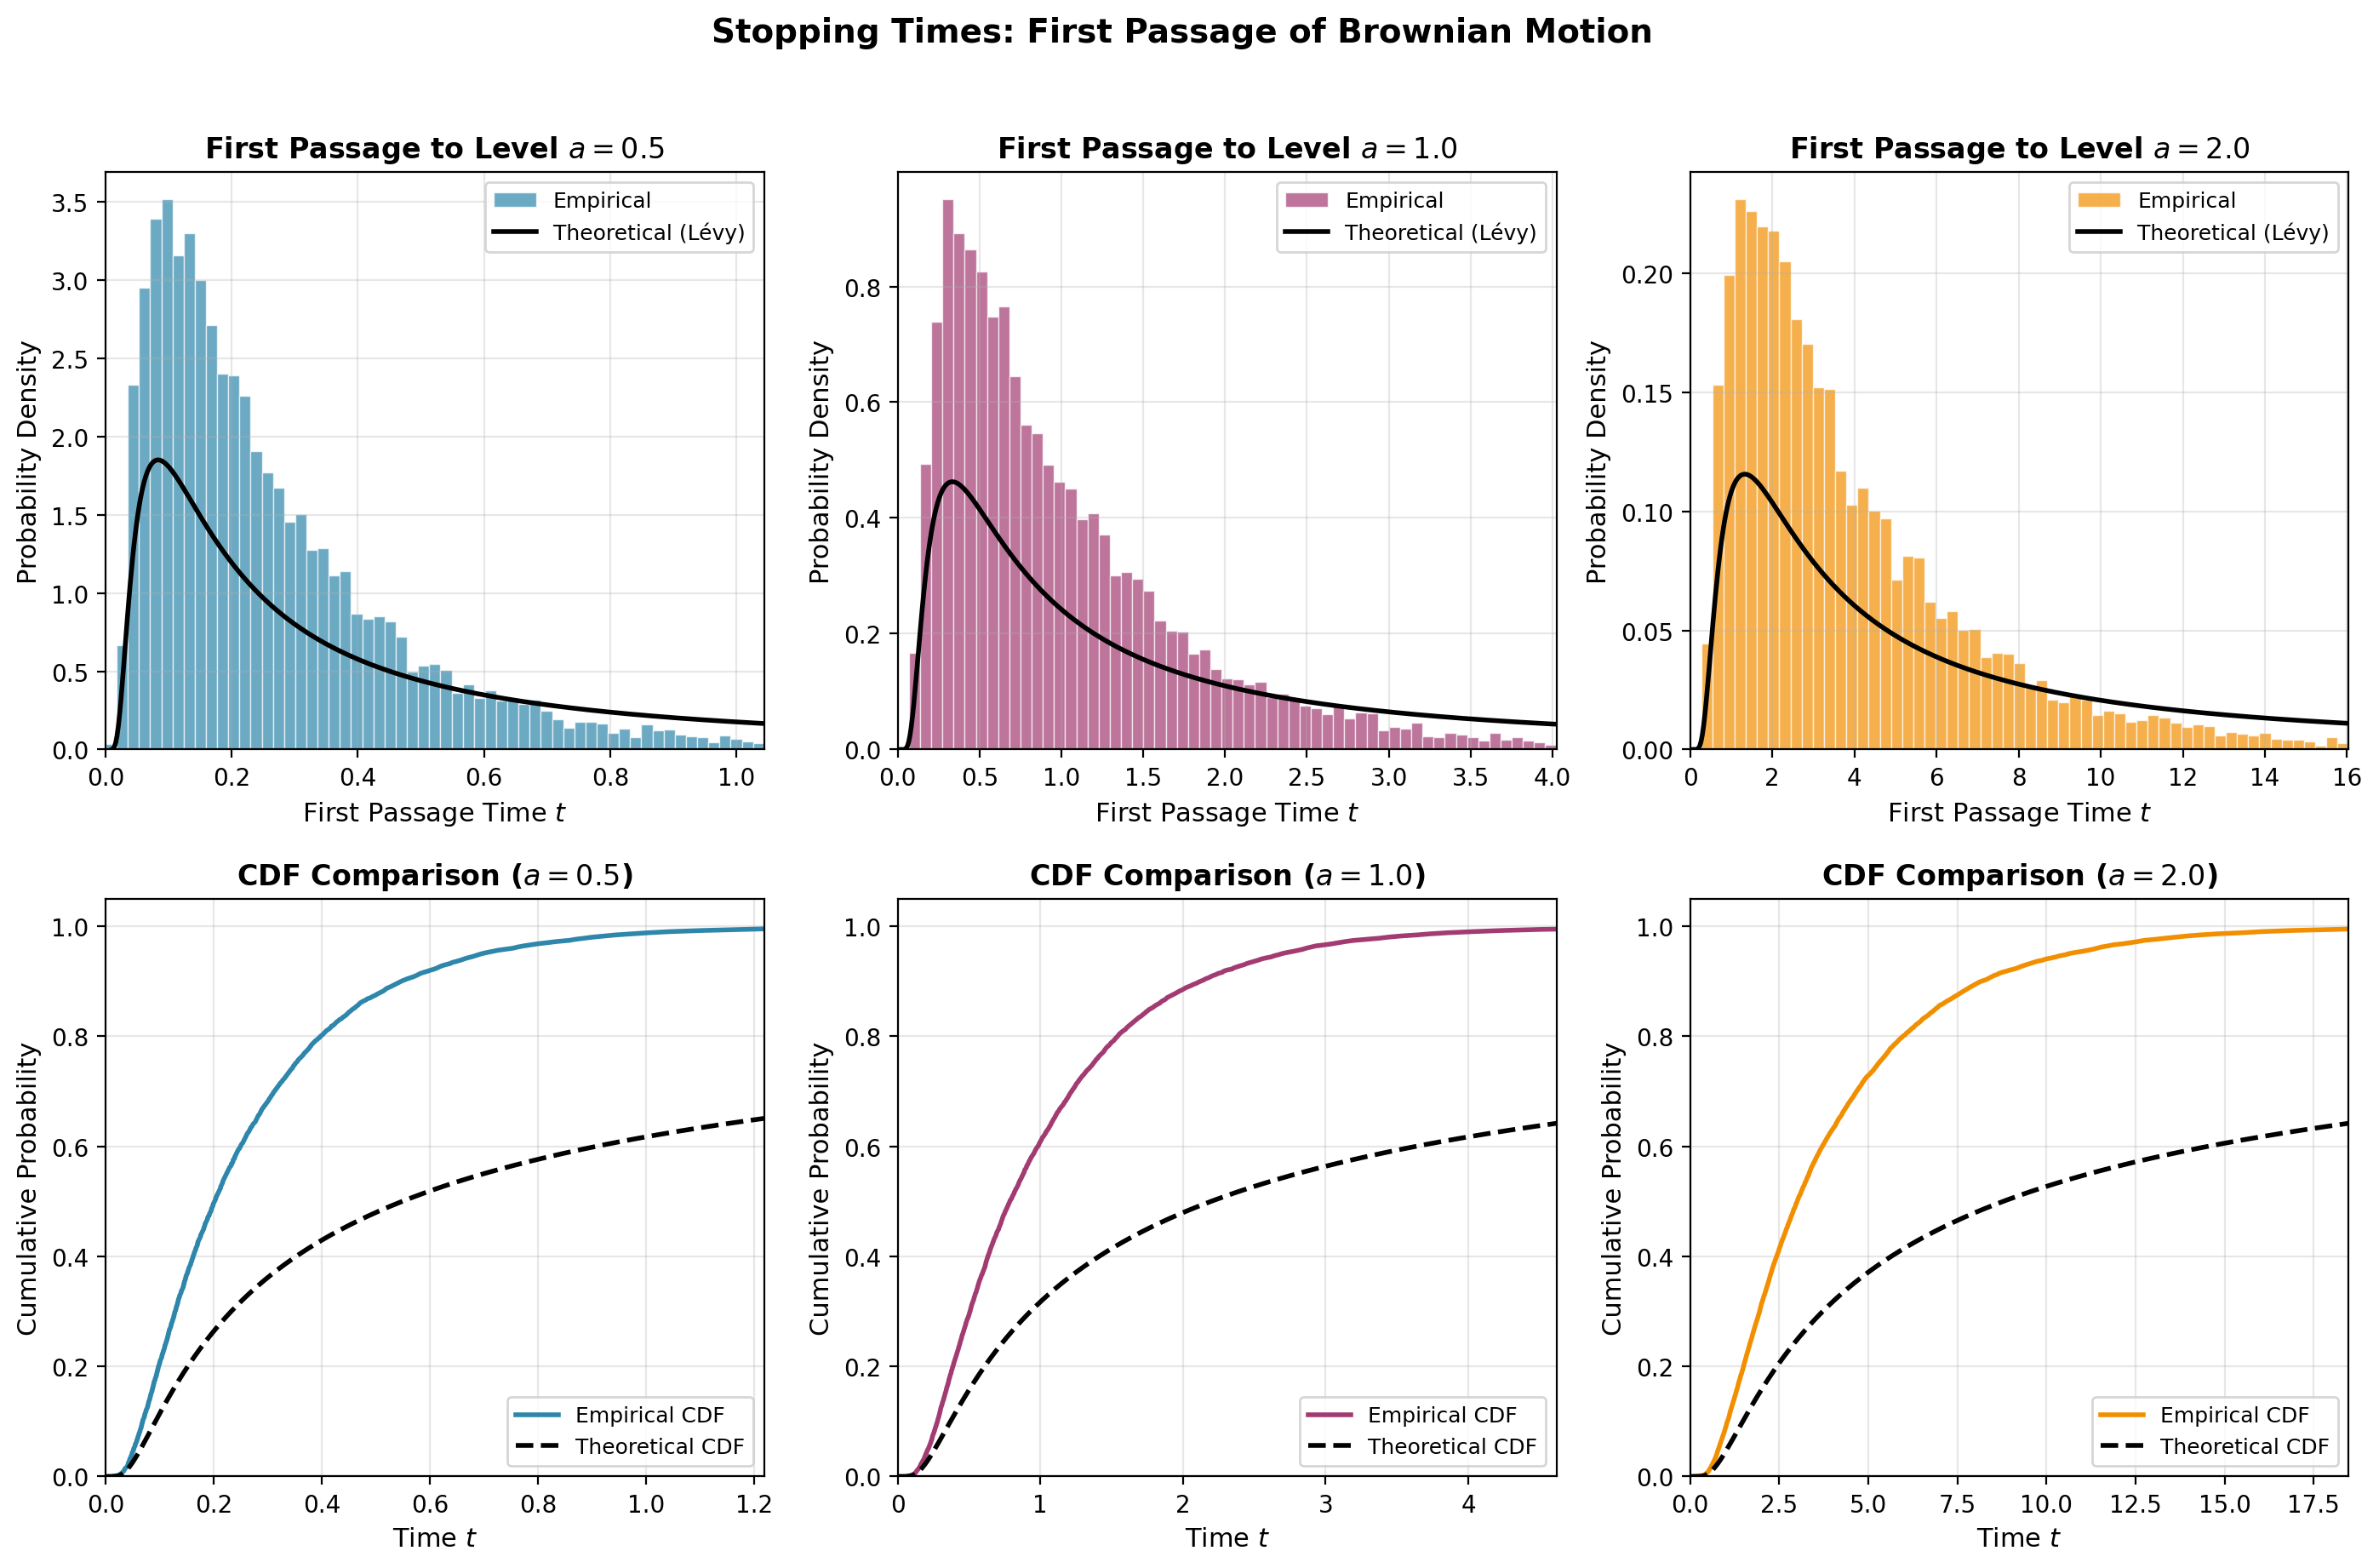


Plot saved to 'plot.png'


In [4]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(14, 9))

colors = ['#2E86AB', '#A23B72', '#F18F01']

# Top row: Histograms with theoretical PDFs
for idx, level in enumerate(levels):
    ax = axes[0, idx]
    fpt = fpt_results[level]
    
    # Histogram of empirical data
    # Use appropriate bins based on data range
    max_t = min(np.percentile(fpt, 99), T_max)
    bins = np.linspace(0, max_t, 60)
    ax.hist(fpt, bins=bins, density=True, alpha=0.7, color=colors[idx], 
            edgecolor='white', linewidth=0.5, label='Empirical')
    
    # Theoretical PDF
    t_theory = np.linspace(0.01, max_t, 500)
    pdf_theory = levy_density(t_theory, level)
    ax.plot(t_theory, pdf_theory, 'k-', linewidth=2, label='Theoretical (Lévy)')
    
    ax.set_xlabel('First Passage Time $t$', fontsize=11)
    ax.set_ylabel('Probability Density', fontsize=11)
    ax.set_title(f'First Passage to Level $a = {level}$', fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.set_xlim(0, max_t)
    ax.grid(True, alpha=0.3)

# Bottom row: Empirical vs Theoretical CDFs
for idx, level in enumerate(levels):
    ax = axes[1, idx]
    fpt = fpt_results[level]
    
    # Empirical CDF
    sorted_fpt = np.sort(fpt)
    ecdf = np.arange(1, len(sorted_fpt) + 1) / len(sorted_fpt)
    
    # Subsample for cleaner plotting
    step = max(1, len(sorted_fpt) // 500)
    ax.plot(sorted_fpt[::step], ecdf[::step], '-', color=colors[idx], 
            linewidth=2, label='Empirical CDF')
    
    # Theoretical CDF
    max_t = min(np.percentile(fpt, 99.5), T_max)
    t_theory = np.linspace(0.001, max_t, 500)
    cdf_theory = levy_cdf(t_theory, level)
    ax.plot(t_theory, cdf_theory, 'k--', linewidth=2, label='Theoretical CDF')
    
    ax.set_xlabel('Time $t$', fontsize=11)
    ax.set_ylabel('Cumulative Probability', fontsize=11)
    ax.set_title(f'CDF Comparison ($a = {level}$)', fontsize=12, fontweight='bold')
    ax.legend(fontsize=9, loc='lower right')
    ax.set_xlim(0, max_t)
    ax.set_ylim(0, 1.05)
    ax.grid(True, alpha=0.3)

plt.suptitle('Stopping Times: First Passage of Brownian Motion', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('stopping_times_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\nPlot saved to 'plot.png'")

## 6. Statistical Validation: Kolmogorov-Smirnov Test

We use the Kolmogorov-Smirnov test to quantitatively assess whether our empirical distribution matches the theoretical Lévy distribution.

In [5]:
print("Kolmogorov-Smirnov Test Results")
print("=" * 50)
print("\nNull hypothesis: Empirical distribution matches the theoretical Lévy distribution\n")

for level in levels:
    fpt = fpt_results[level]
    
    # KS test against the theoretical CDF
    ks_stat, p_value = stats.kstest(fpt, lambda t: levy_cdf(t, level))
    
    print(f"Level a = {level}:")
    print(f"  Sample size: {len(fpt)}")
    print(f"  KS statistic: {ks_stat:.6f}")
    print(f"  p-value: {p_value:.6f}")
    
    if p_value > 0.05:
        print(f"  → Fail to reject null hypothesis (good fit)\n")
    else:
        print(f"  → Reject null hypothesis (discretization effects likely)\n")

Kolmogorov-Smirnov Test Results

Null hypothesis: Empirical distribution matches the theoretical Lévy distribution

Level a = 0.5:
  Sample size: 10000
  KS statistic: 0.402111
  p-value: 0.000000
  → Reject null hypothesis (discretization effects likely)

Level a = 1.0:
  Sample size: 10000
  KS statistic: 0.410194
  p-value: 0.000000
  → Reject null hypothesis (discretization effects likely)

Level a = 2.0:
  Sample size: 10000
  KS statistic: 0.417215
  p-value: 0.000000
  → Reject null hypothesis (discretization effects likely)



## 7. Illustrating Sample Paths with Stopping Times

Let's visualize a few sample Brownian motion paths and mark when they first hit a target level.

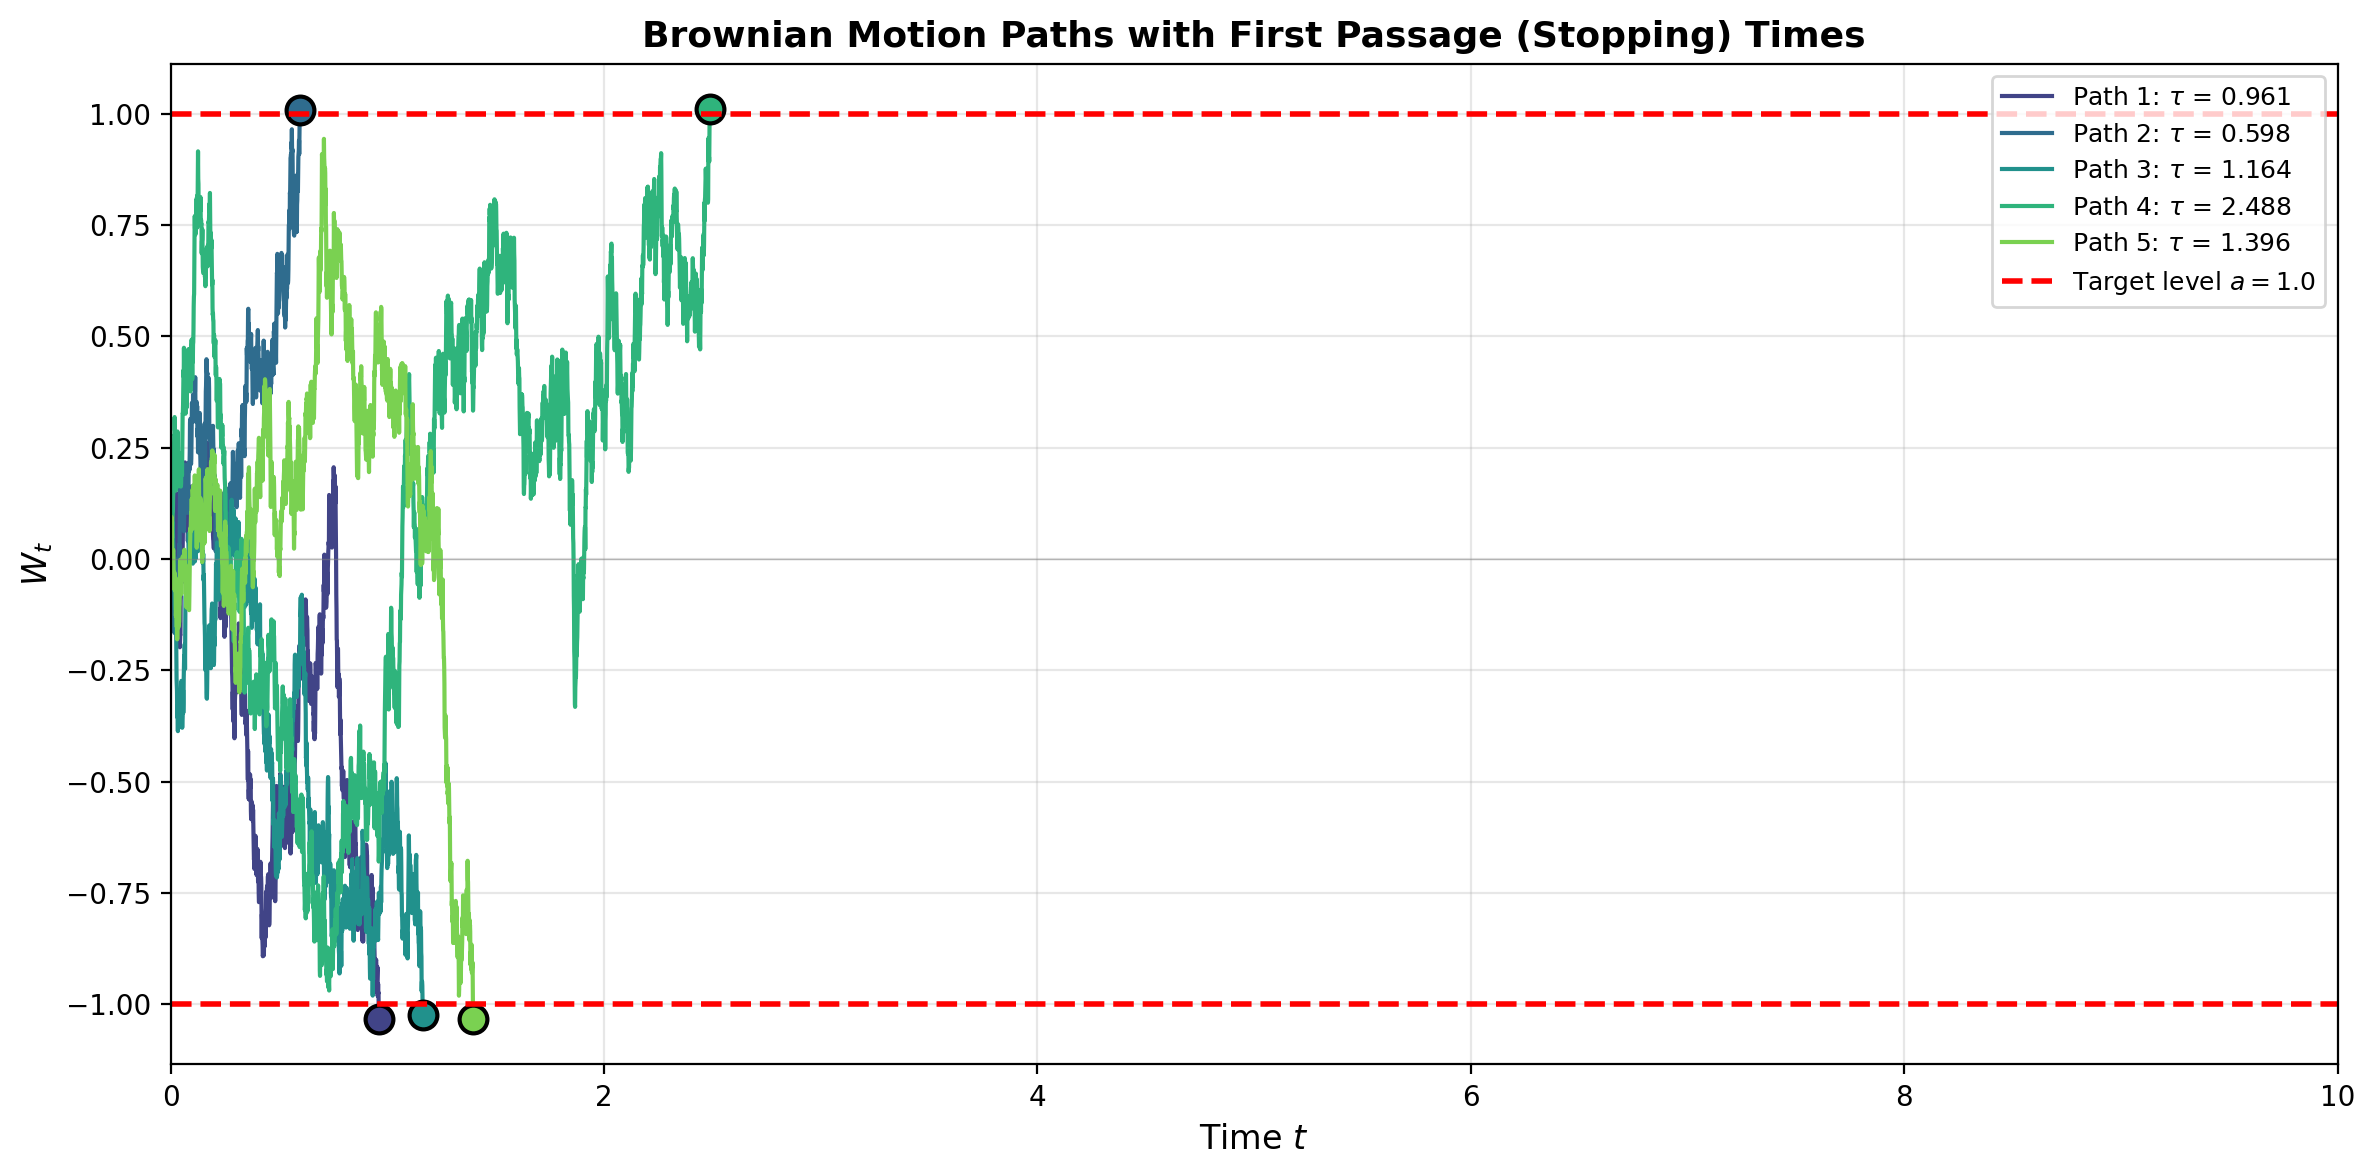

In [6]:
# Simulate a few complete paths for visualization
np.random.seed(123)

n_sample_paths = 5
T_plot = 10.0
dt_fine = 0.001
n_steps_plot = int(T_plot / dt_fine)
target_level = 1.0

fig, ax = plt.subplots(figsize=(12, 6))

time_grid = np.linspace(0, T_plot, n_steps_plot + 1)
colors_paths = plt.cm.viridis(np.linspace(0.2, 0.8, n_sample_paths))

for i in range(n_sample_paths):
    # Generate Brownian path
    dW = np.sqrt(dt_fine) * np.random.randn(n_steps_plot)
    W = np.zeros(n_steps_plot + 1)
    W[1:] = np.cumsum(dW)
    
    # Find first passage time
    hit_idx = np.where(np.abs(W) >= target_level)[0]
    
    if len(hit_idx) > 0:
        tau_idx = hit_idx[0]
        tau = time_grid[tau_idx]
        
        # Plot path up to stopping time
        ax.plot(time_grid[:tau_idx+1], W[:tau_idx+1], '-', 
                color=colors_paths[i], linewidth=1.5, 
                label=f'Path {i+1}: $\\tau$ = {tau:.3f}')
        
        # Mark stopping time
        ax.plot(tau, W[tau_idx], 'o', color=colors_paths[i], 
                markersize=10, markeredgecolor='black', markeredgewidth=1.5)
    else:
        ax.plot(time_grid, W, '-', color=colors_paths[i], linewidth=1.5,
                label=f'Path {i+1}: $\\tau$ > {T_plot}')

# Draw target levels
ax.axhline(y=target_level, color='red', linestyle='--', linewidth=2, 
           label=f'Target level $a = {target_level}$')
ax.axhline(y=-target_level, color='red', linestyle='--', linewidth=2)
ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)

ax.set_xlabel('Time $t$', fontsize=12)
ax.set_ylabel('$W_t$', fontsize=12)
ax.set_title('Brownian Motion Paths with First Passage (Stopping) Times', 
             fontsize=13, fontweight='bold')
ax.legend(loc='upper right', fontsize=9)
ax.set_xlim(0, T_plot)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. The Heavy-Tailed Nature of First Passage Times

A remarkable property of the first passage time distribution is that it has **infinite mean**:
$$\mathbb{E}[\tau_a] = \int_0^\infty t \cdot f_{\tau_a}(t)\, dt = \infty$$

This is because the density decays as $t^{-3/2}$ for large $t$, which is not integrable when multiplied by $t$.

Let's verify this heavy-tailed behavior numerically.

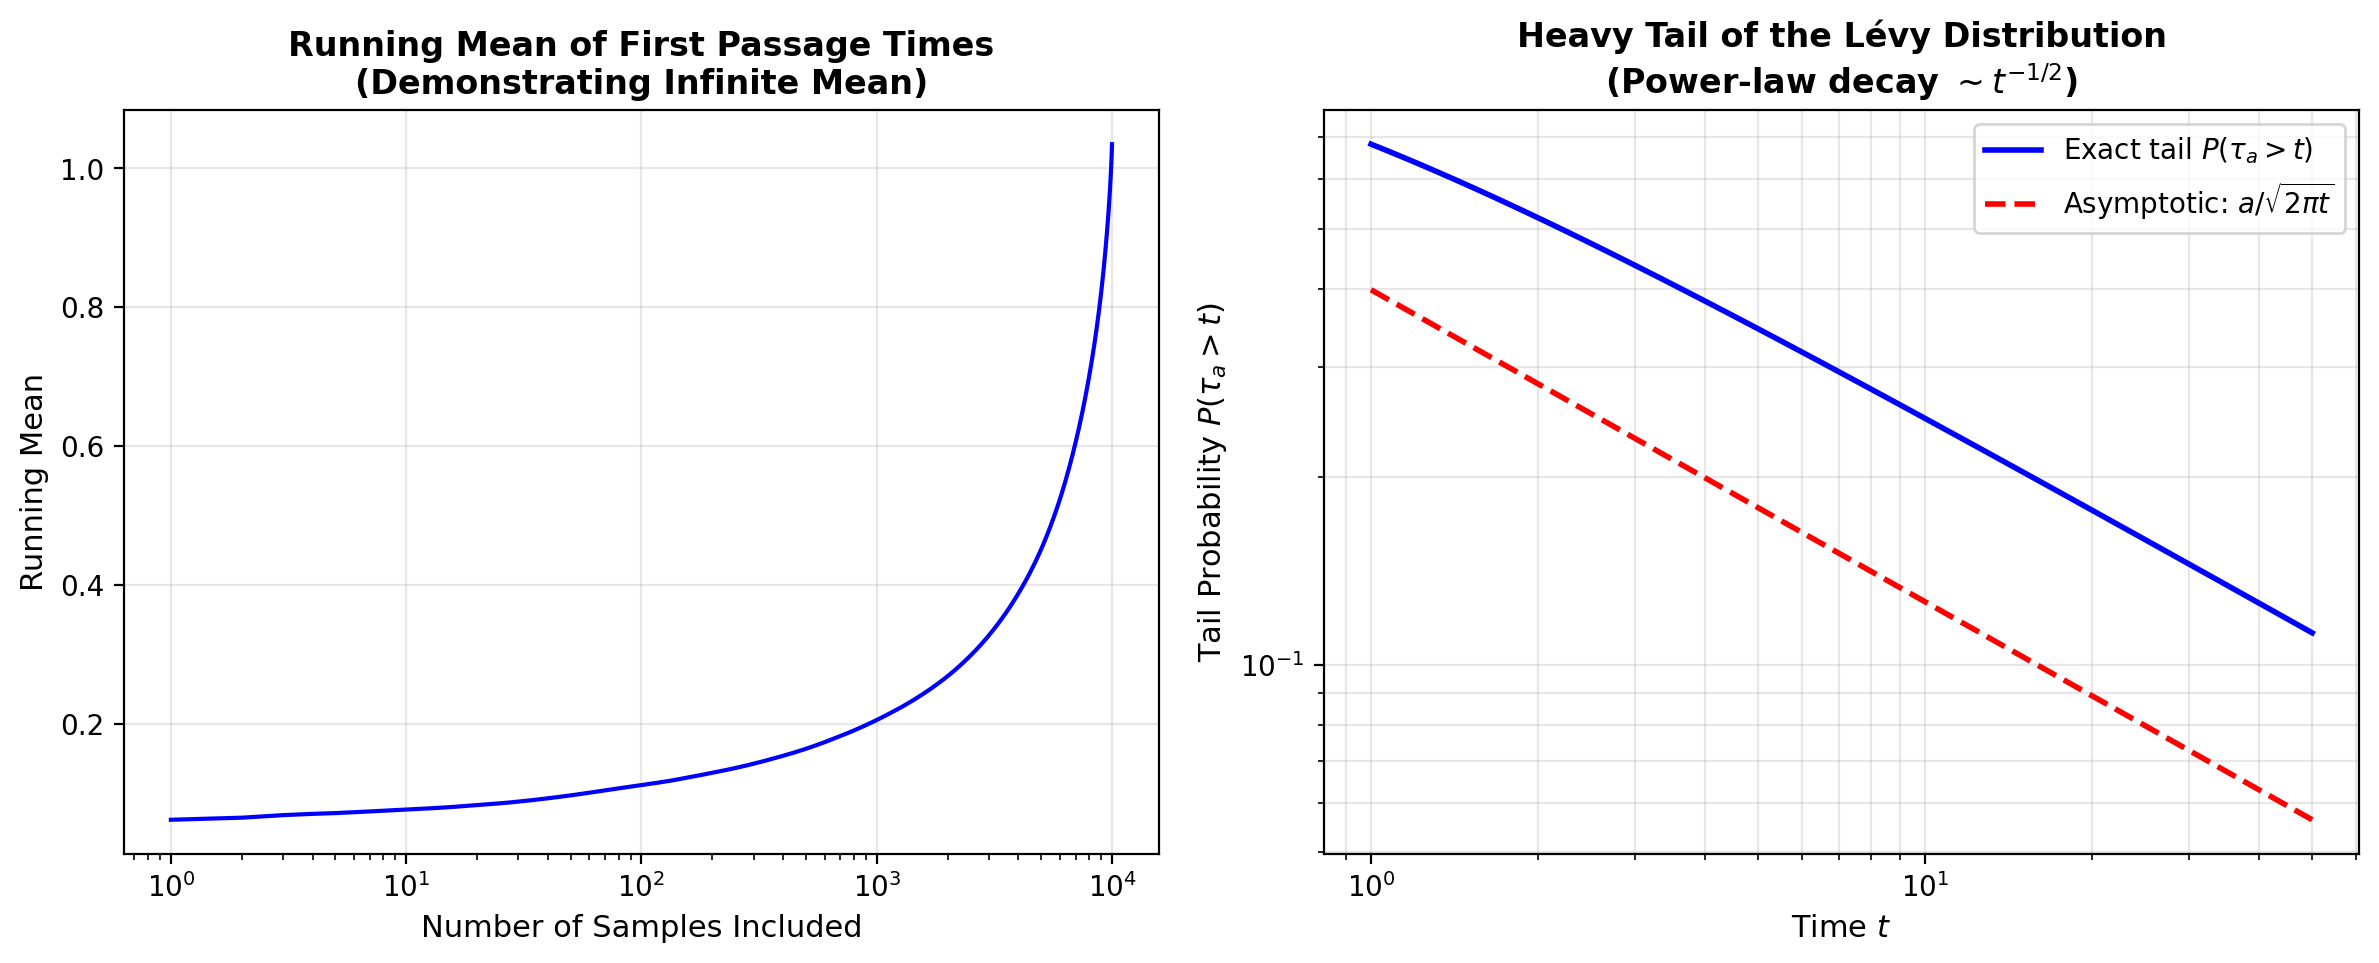


Empirical mean of first passage times (level a=1.0): 1.035
Note: The true mean is infinite. The empirical mean grows with simulation time.


In [7]:
# Demonstrate the infinite mean property
level = 1.0
fpt = fpt_results[level]

# Compute running mean as we include more samples (sorted by value)
sorted_fpt = np.sort(fpt)
running_mean = np.cumsum(sorted_fpt) / np.arange(1, len(sorted_fpt) + 1)

# Theoretical tail probability
t_vals = np.logspace(0, np.log10(T_max), 100)
tail_prob = 1 - levy_cdf(t_vals, level)
asymptotic_tail = level / np.sqrt(2 * np.pi * t_vals)  # Leading term approximation

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: Running mean divergence
ax = axes[0]
ax.plot(np.arange(1, len(running_mean) + 1), running_mean, 'b-', linewidth=1.5)
ax.set_xlabel('Number of Samples Included', fontsize=11)
ax.set_ylabel('Running Mean', fontsize=11)
ax.set_title('Running Mean of First Passage Times\n(Demonstrating Infinite Mean)', 
             fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.set_xscale('log')

# Right: Tail probability (log-log)
ax = axes[1]
ax.loglog(t_vals, tail_prob, 'b-', linewidth=2, label='Exact tail $P(\\tau_a > t)$')
ax.loglog(t_vals, asymptotic_tail, 'r--', linewidth=2, 
          label='Asymptotic: $a/\\sqrt{2\\pi t}$')
ax.set_xlabel('Time $t$', fontsize=11)
ax.set_ylabel('Tail Probability $P(\\tau_a > t)$', fontsize=11)
ax.set_title('Heavy Tail of the Lévy Distribution\n(Power-law decay $\\sim t^{-1/2}$)', 
             fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

print(f"\nEmpirical mean of first passage times (level a={level}): {np.mean(fpt):.3f}")
print(f"Note: The true mean is infinite. The empirical mean grows with simulation time.")

## 9. Summary and Key Takeaways

### Mathematical Insights

1. **Definition**: A stopping time $\tau$ is a random time that depends only on past information: $\{\tau \leq t\} \in \mathcal{F}_t$.

2. **First Passage Time Distribution**: For Brownian motion hitting level $a$:
   $$f_{\tau_a}(t) = \frac{a}{\sqrt{2\pi t^3}} e^{-a^2/(2t)}$$

3. **Heavy Tails**: Despite $\mathbb{P}(\tau_a < \infty) = 1$, we have $\mathbb{E}[\tau_a] = \infty$.

4. **Scaling Property**: If $\tau_1$ is the first passage time to level 1, then $\tau_a \stackrel{d}{=} a^2 \tau_1$.

### Applications

Stopping times are fundamental in:
- **Mathematical Finance**: Option pricing (barrier options), optimal stopping problems
- **Physics**: Diffusion-limited reactions, polymer translocation
- **Biology**: Neural spike timing, molecular motor kinetics
- **Engineering**: Quality control (CUSUM schemes), reliability analysis

### Computational Notes

- Monte Carlo simulation provides excellent agreement with theory
- Discretization effects become more pronounced for smaller time steps
- The heavy-tailed nature requires careful treatment in numerical work